Começamos este método novamente, importando todas as bibliotecas necessárias assim como o arquivo csv do DataSet (este arquivo já está pré formatado, apenas precisa de alguns ajustes).
Após isto, é realizado os ajustes finais no arquivo csv de forma a deixá-lo 100% pronto para a utilização no método de regressão.

In [4]:
# Imports of necessary libraries and csv file.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPRegressor
from sklearn import metrics
from sklearn.preprocessing import StandardScaler
from google.colab import files
# uploaded = files.upload()
df = pd.read_csv('DataSet Games real.csv')

#Formatting some last things on the csv to let it be usable for the learning
df['Publisher'] = df['Publisher'].fillna(0)
df['Year'] = df['Year'].fillna(2000)

df.drop('Rank',axis=1,inplace=True)

x = df.drop('Global_Sales', axis=1)
y = df['Global_Sales']


Então, dividimos as variáveis de teste e treino, e alocamos a quantidade de dados utilizadas para o teste e aprendizado do algorítmo (neste caso, 20% dos dados será utilizado para teste, o resto será o treino).
Inicializamos então a preparação do algorítmo, passando as variáveis utilizadas para treino e transformando-as de acordo com o algorítmo.
Chamamos então o método regressor para definir as camadas, seus valores e pesos, bem como o formato da função de ativação e do otimizador dos pesos dos neurônios.
Então, botamos em prática o aprendizado e, por fim, a previsão.
Após isso, com a ajuda de algumas bibliotecas, um gráfico a respeito da comparação dos resultados reais e previstos da variável target, é exibido, e exibimos também as métricas de média de erro.
Nota-se que este método consome um bom tempo de compilação uma vez que ele é realizado em camadas (ciclos, por assim dizer), o que exige bastante poder de processamento.

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


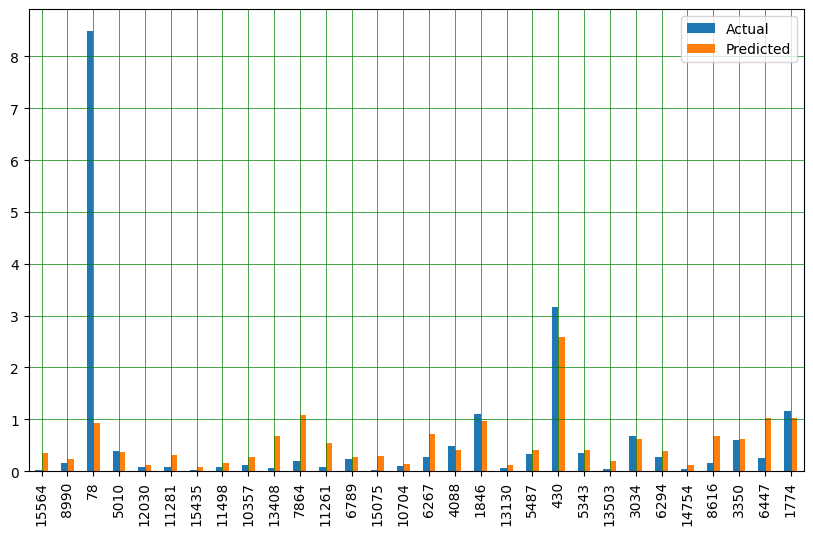

Mean Absolute Error: 0.4848734059619139
Mean Squared Error: 3.118902625271896
Root Mean Squared Error: 1.7660415128959726


In [6]:
# Allocating the variables for learning and testing as well as the size of data used for testing.
trainX, testX, trainY, testY = train_test_split(x, y, test_size = 0.2)

# Setuping and starting the regression method
sc=StandardScaler()

scaler = sc.fit(trainX)
trainX_scaled = scaler.transform(trainX)
testX_scaled = scaler.transform(testX)

mlp_reg = MLPRegressor(hidden_layer_sizes=(150,100,50),
                       max_iter = 100,activation = 'relu', solver = 'adam')
mlp_reg.fit(trainX_scaled, trainY)
y_pred = mlp_reg.predict(testX_scaled)

# Creating the Graph with predicted and actual values.
# The y axis is a scalar value which tells how distant the prediction and actual values are.
# The x axis tells which rows from the csv it was taken.
df_temp = pd.DataFrame({'Actual': testY, 'Predicted': y_pred})
df_temp.head()
df_temp = df_temp.head(30)
df_temp.plot(kind='bar',figsize=(10,6))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

# Printing the mean of errors
print('Mean Absolute Error:', metrics.mean_absolute_error(testY, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(testY, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(testY, y_pred)))